In [1]:
import numpy as np
import pandas as pd
import country_converter as coco

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hdi_df = pd.read_csv("hdi.csv", thousands=',')
hdi_df["Country"] = coco.convert(names=hdi_df["Country"].values.tolist(), to='ISO3')
hdi_df

Country  Life expectancy at birth  Expected years of schooling  \
0       NOR                      82.4                         18.1   
1       IRL                      82.3                         18.7   
2       CHE                      83.8                         16.3   
3       HKG                      84.9                         16.9   
4       ISL                      83.0                         19.1   
..      ...                       ...                          ...   
184     BDI                      61.6                         11.1   
185     SSD                      57.9                          5.3   
186     TCD                      54.2                          7.3   
187     CAF                      53.3                          7.6   
188     NER                      62.4                          6.5   

     Mean years of schooling  Gross national income (GNI) per capita  
0                       12.9                                   66494  
1                       12.7                                   68371  
2                       13.4                                   69394  
3                       12.3                                   62985  
4                       12.8                                   54682  
..                       ...                                     ...  
184                      3.3                                     754  
185                      4.8                                    2003  
186                      2.5                                    1555  
187                      4.3                                     993  
188                      2.1                                    1201  

[189 rows x 5 columns]

In [3]:
econ_df = pd.read_csv("econ-freedom.csv")
econ_df = econ_df[econ_df["Index Year"] == 2019].drop("Index Year",axis=1)
econ_df.rename(columns = {"Name":"Country"},inplace=True)
econ_df.drop("Overall Score", axis=1, inplace=True)
econ_df["Country"] = coco.convert(names=econ_df["Country"].values.tolist(), to='ISO3')
econ_df

Country  Property Rights  Government Integrity  Judicial Effectiveness  \
0       AFG             19.6                  25.2                    29.6   
1       ALB             54.8                  40.4                    30.6   
2       DZA             31.6                  28.9                    36.2   
3       AGO             35.9                  20.5                    26.6   
4       ARG             47.8                  33.5                    44.5   
..      ...              ...                   ...                     ...   
181     VEN              7.6                   7.9                    13.1   
182     VNM             49.8                  34.0                    40.3   
183     YEM             19.6                  20.3                    22.2   
184     ZMB             45.0                  32.3                    35.6   
185     ZWE             29.7                  15.8                    24.8   

     Tax Burden  Government Spending  Fiscal Health  Business Freedom  \
0          91.7                 80.3           99.3              49.2   
1          86.3                 73.9           80.6              69.3   
2          76.4                 48.7           18.7              61.6   
3          83.9                 80.7           58.2              55.7   
4          69.3                 49.5           33.0              56.4   
..          ...                  ...            ...               ...   
181        74.7                 58.1           17.6              33.9   
182        79.7                 74.1           40.7              63.5   
183         NaN                 83.7            0.0              45.1   
184        72.3                 80.1           12.3              71.1   
185        62.3                 74.5           23.7              33.4   

     Labor Freedom  Monetary Freedom  Trade Freedom  Investment Freedom  \
0             60.4              76.7           66.0                10.0   
1             52.7              81.5           87.8                70.0   
2             49.9              74.9           67.4                30.0   
3             58.8              55.4           61.2                30.0   
4             46.9              60.2           70.0                55.0   
..             ...               ...            ...                 ...   
181           28.0               0.0           60.0                 0.0   
182           62.8              68.9           79.2                30.0   
183           49.8              61.5           71.4                50.0   
184           46.0              70.3           72.6                55.0   
185           43.3              72.4           70.0                25.0   

     Financial Freedom  
0                 10.0  
1                 70.0  
2                 30.0  
3                 40.0  
4                 60.0  
..                 ...  
181               10.0  
182               40.0  
183                NaN  
184               50.0  
185               10.0  

[186 rows x 13 columns]

In [4]:
econ_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 186 non-null    object 
 1   Property Rights         185 non-null    float64
 2   Government Integrity    185 non-null    float64
 3   Judicial Effectiveness  185 non-null    float64
 4   Tax Burden              180 non-null    float64
 5   Government Spending     183 non-null    float64
 6   Fiscal Health           183 non-null    float64
 7   Business Freedom        185 non-null    float64
 8   Labor Freedom           184 non-null    float64
 9   Monetary Freedom        184 non-null    float64
 10  Trade Freedom           182 non-null    float64
 11  Investment Freedom      184 non-null    float64
 12  Financial Freedom       181 non-null    float64
dtypes: float64(12), object(1)
memory usage: 20.3+ KB


In [5]:
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 189 non-null    object 
 1   Life expectancy at birth                189 non-null    float64
 2   Expected years of schooling             189 non-null    float64
 3   Mean years of schooling                 189 non-null    float64
 4   Gross national income (GNI) per capita  189 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 7.5+ KB


In [6]:
df = pd.merge(econ_df,hdi_df,on="Country")
df

Country  Property Rights  Government Integrity  Judicial Effectiveness  \
0       AFG             19.6                  25.2                    29.6   
1       ALB             54.8                  40.4                    30.6   
2       DZA             31.6                  28.9                    36.2   
3       AGO             35.9                  20.5                    26.6   
4       ARG             47.8                  33.5                    44.5   
..      ...              ...                   ...                     ...   
176     VEN              7.6                   7.9                    13.1   
177     VNM             49.8                  34.0                    40.3   
178     YEM             19.6                  20.3                    22.2   
179     ZMB             45.0                  32.3                    35.6   
180     ZWE             29.7                  15.8                    24.8   

     Tax Burden  Government Spending  Fiscal Health  Business Freedom  \
0          91.7                 80.3           99.3              49.2   
1          86.3                 73.9           80.6              69.3   
2          76.4                 48.7           18.7              61.6   
3          83.9                 80.7           58.2              55.7   
4          69.3                 49.5           33.0              56.4   
..          ...                  ...            ...               ...   
176        74.7                 58.1           17.6              33.9   
177        79.7                 74.1           40.7              63.5   
178         NaN                 83.7            0.0              45.1   
179        72.3                 80.1           12.3              71.1   
180        62.3                 74.5           23.7              33.4   

     Labor Freedom  Monetary Freedom  Trade Freedom  Investment Freedom  \
0             60.4              76.7           66.0                10.0   
1             52.7              81.5           87.8                70.0   
2             49.9              74.9           67.4                30.0   
3             58.8              55.4           61.2                30.0   
4             46.9              60.2           70.0                55.0   
..             ...               ...            ...                 ...   
176           28.0               0.0           60.0                 0.0   
177           62.8              68.9           79.2                30.0   
178           49.8              61.5           71.4                50.0   
179           46.0              70.3           72.6                55.0   
180           43.3              72.4           70.0                25.0   

     Financial Freedom  Life expectancy at birth  Expected years of schooling  \
0                 10.0                      64.8                         10.2   
1                 70.0                      78.6                         14.7   
2                 30.0                      76.9                         14.6   
3                 40.0                      61.2                         11.8   
4                 60.0                      76.7                         17.7   
..                 ...                       ...                          ...   
176               10.0                      72.1                         12.8   
177               40.0                      75.4                         12.7   
178                NaN                      66.1                          8.8   
179               50.0                      63.9                         11.5   
180               10.0                      61.5                         11.0   

     Mean years of schooling  Gross national income (GNI) per capita  
0                        3.9                                    2229  
1                       10.1                                   13998  
2                        8.0                                   11174  
3                        5.2    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 180
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 181 non-null    object 
 1   Property Rights                         180 non-null    float64
 2   Government Integrity                    180 non-null    float64
 3   Judicial Effectiveness                  180 non-null    float64
 4   Tax Burden                              176 non-null    float64
 5   Government Spending                     179 non-null    float64
 6   Fiscal Health                           179 non-null    float64
 7   Business Freedom                        180 non-null    float64
 8   Labor Freedom                           180 non-null    float64
 9   Monetary Freedom                        180 non-null    float64
 10  Trade Freedom                           178 non-null    float6

In [8]:
df = df[~(df.isna().sum(axis=1) > 3)]
df

Country  Property Rights  Government Integrity  Judicial Effectiveness  \
0       AFG             19.6                  25.2                    29.6   
1       ALB             54.8                  40.4                    30.6   
2       DZA             31.6                  28.9                    36.2   
3       AGO             35.9                  20.5                    26.6   
4       ARG             47.8                  33.5                    44.5   
..      ...              ...                   ...                     ...   
176     VEN              7.6                   7.9                    13.1   
177     VNM             49.8                  34.0                    40.3   
178     YEM             19.6                  20.3                    22.2   
179     ZMB             45.0                  32.3                    35.6   
180     ZWE             29.7                  15.8                    24.8   

     Tax Burden  Government Spending  Fiscal Health  Business Freedom  \
0          91.7                 80.3           99.3              49.2   
1          86.3                 73.9           80.6              69.3   
2          76.4                 48.7           18.7              61.6   
3          83.9                 80.7           58.2              55.7   
4          69.3                 49.5           33.0              56.4   
..          ...                  ...            ...               ...   
176        74.7                 58.1           17.6              33.9   
177        79.7                 74.1           40.7              63.5   
178         NaN                 83.7            0.0              45.1   
179        72.3                 80.1           12.3              71.1   
180        62.3                 74.5           23.7              33.4   

     Labor Freedom  Monetary Freedom  Trade Freedom  Investment Freedom  \
0             60.4              76.7           66.0                10.0   
1             52.7              81.5           87.8                70.0   
2             49.9              74.9           67.4                30.0   
3             58.8              55.4           61.2                30.0   
4             46.9              60.2           70.0                55.0   
..             ...               ...            ...                 ...   
176           28.0               0.0           60.0                 0.0   
177           62.8              68.9           79.2                30.0   
178           49.8              61.5           71.4                50.0   
179           46.0              70.3           72.6                55.0   
180           43.3              72.4           70.0                25.0   

     Financial Freedom  Life expectancy at birth  Expected years of schooling  \
0                 10.0                      64.8                         10.2   
1                 70.0                      78.6                         14.7   
2                 30.0                      76.9                         14.6   
3                 40.0                      61.2                         11.8   
4                 60.0                      76.7                         17.7   
..                 ...                       ...                          ...   
176               10.0                      72.1                         12.8   
177               40.0                      75.4                         12.7   
178                NaN                      66.1                          8.8   
179               50.0                      63.9                         11.5   
180               10.0                      61.5                         11.0   

     Mean years of schooling  Gross national income (GNI) per capita  
0                        3.9                                    2229  
1                       10.1                                   13998  
2                        8.0                                   11174  
3                        5.2    

In [9]:
df1 = df.copy(deep=True)

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute = IterativeImputer()
df1.iloc[:,1:] = impute.fit_transform(df1.iloc[:,1:])
df1.round(decimals=2)

Country  Property Rights  Government Integrity  Judicial Effectiveness  \
0       AFG             19.6                  25.2                    29.6   
1       ALB             54.8                  40.4                    30.6   
2       DZA             31.6                  28.9                    36.2   
3       AGO             35.9                  20.5                    26.6   
4       ARG             47.8                  33.5                    44.5   
..      ...              ...                   ...                     ...   
176     VEN              7.6                   7.9                    13.1   
177     VNM             49.8                  34.0                    40.3   
178     YEM             19.6                  20.3                    22.2   
179     ZMB             45.0                  32.3                    35.6   
180     ZWE             29.7                  15.8                    24.8   

     Tax Burden  Government Spending  Fiscal Health  Business Freedom  \
0         91.70                 80.3           99.3              49.2   
1         86.30                 73.9           80.6              69.3   
2         76.40                 48.7           18.7              61.6   
3         83.90                 80.7           58.2              55.7   
4         69.30                 49.5           33.0              56.4   
..          ...                  ...            ...               ...   
176       74.70                 58.1           17.6              33.9   
177       79.70                 74.1           40.7              63.5   
178       83.79                 83.7            0.0              45.1   
179       72.30                 80.1           12.3              71.1   
180       62.30                 74.5           23.7              33.4   

     Labor Freedom  Monetary Freedom  Trade Freedom  Investment Freedom  \
0             60.4              76.7           66.0                10.0   
1             52.7              81.5           87.8                70.0   
2             49.9              74.9           67.4                30.0   
3             58.8              55.4           61.2                30.0   
4             46.9              60.2           70.0                55.0   
..             ...               ...            ...                 ...   
176           28.0               0.0           60.0                 0.0   
177           62.8              68.9           79.2                30.0   
178           49.8              61.5           71.4                50.0   
179           46.0              70.3           72.6                55.0   
180           43.3              72.4           70.0                25.0   

     Financial Freedom  Life expectancy at birth  Expected years of schooling  \
0                10.00                      64.8                         10.2   
1                70.00                      78.6                         14.7   
2                30.00                      76.9                         14.6   
3                40.00                      61.2                         11.8   
4                60.00                      76.7                         17.7   
..                 ...                       ...                          ...   
176              10.00                      72.1                         12.8   
177              40.00                      75.4                         12.7   
178              36.55                      66.1                          8.8   
179              50.00                      63.9                         11.5   
180              10.00                      61.5                         11.0   

     Mean years of schooling  Gross national income (GNI) per capita  
0                        3.9                                  2229.0  
1                       10.1                                 13998.0  
2                        8.0                                 11174.0  
3                        5.2    

In [30]:
df1.iloc[:,6:12].describe()

Business Freedom  Labor Freedom  Monetary Freedom  Trade Freedom  \
count        178.000000     178.000000        178.000000     178.000000   
mean          63.946067      59.805056         75.532022      74.644045   
std           15.067555      13.974105          9.662288      10.782074   
min           17.700000      20.000000          0.000000      45.000000   
25%           54.625000      50.800000         72.000000      66.650000   
50%           65.150000      60.000000         77.800000      76.100000   
75%           75.075000      69.075000         81.775000      83.950000   
max           96.400000      91.000000         88.000000      95.000000   

       Investment Freedom  Financial Freedom  
count          178.000000         178.000000  
mean            57.528090          48.527753  
std             21.922096          19.249450  
min              0.000000          10.000000  
25%             45.000000          30.000000  
50%             60.000000          50.000000  
75%             75.000000          60.000000  
max             95.000000          90.000000

In [11]:
df1.set_index("Country")

Property Rights  Government Integrity  Judicial Effectiveness  \
Country                                                                  
AFG                 19.6                  25.2                    29.6   
ALB                 54.8                  40.4                    30.6   
DZA                 31.6                  28.9                    36.2   
AGO                 35.9                  20.5                    26.6   
ARG                 47.8                  33.5                    44.5   
...                  ...                   ...                     ...   
VEN                  7.6                   7.9                    13.1   
VNM                 49.8                  34.0                    40.3   
YEM                 19.6                  20.3                    22.2   
ZMB                 45.0                  32.3                    35.6   
ZWE                 29.7                  15.8                    24.8   

         Tax Burden  Government Spending  Fiscal Health  Business Freedom  \
Country                                                                     
AFG       91.700000                 80.3           99.3              49.2   
ALB       86.300000                 73.9           80.6              69.3   
DZA       76.400000                 48.7           18.7              61.6   
AGO       83.900000                 80.7           58.2              55.7   
ARG       69.300000                 49.5           33.0              56.4   
...             ...                  ...            ...               ...   
VEN       74.700000                 58.1           17.6              33.9   
VNM       79.700000                 74.1           40.7              63.5   
YEM       83.793099                 83.7            0.0              45.1   
ZMB       72.300000                 80.1           12.3              71.1   
ZWE       62.300000                 74.5           23.7              33.4   

         Labor Freedom  Monetary Freedom  Trade Freedom  Investment Freedom  \
Country                                                                       
AFG               60.4              76.7           66.0                10.0   
ALB               52.7              81.5           87.8                70.0   
DZA               49.9              74.9           67.4                30.0   
AGO               58.8              55.4           61.2                30.0   
ARG               46.9              60.2           70.0                55.0   
...                ...               ...            ...                 ...   
VEN               28.0               0.0           60.0                 0.0   
VNM               62.8              68.9           79.2                30.0   
YEM               49.8              61.5           71.4                50.0   
ZMB               46.0              70.3           72.6                55.0   
ZWE               43.3              72.4           70.0                25.0   

         Financial Freedom  Life expectancy at birth  \
Country                                                
AFG              10.000000                      64.8   
ALB              70.000000                      78.6   
DZA              30.000000                      76.9   
AGO              40.000000                      61.2   
ARG              60.000000                      76.7   
...                    ...                       ...   
VEN              10.000000                      72.1   
VNM              40.000000                      75.4   
YEM              36.547998                      66.1   
ZMB              50.000000                      63.9   
ZWE              10.000000                      61.5   

         Expected years of schooling  Mean years of schooling  \
Country                                                         
AFG                             10.2                      3.9   
ALB                             14.7                     10.1   
DZA                        

In [16]:
df1 = df1.round(2)
df1

Country  Property Rights  Government Integrity  Judicial Effectiveness  \
0       AFG             19.6                  25.2                    29.6   
1       ALB             54.8                  40.4                    30.6   
2       DZA             31.6                  28.9                    36.2   
3       AGO             35.9                  20.5                    26.6   
4       ARG             47.8                  33.5                    44.5   
..      ...              ...                   ...                     ...   
176     VEN              7.6                   7.9                    13.1   
177     VNM             49.8                  34.0                    40.3   
178     YEM             19.6                  20.3                    22.2   
179     ZMB             45.0                  32.3                    35.6   
180     ZWE             29.7                  15.8                    24.8   

     Tax Burden  Government Spending  Fiscal Health  Business Freedom  \
0         91.70                 80.3           99.3              49.2   
1         86.30                 73.9           80.6              69.3   
2         76.40                 48.7           18.7              61.6   
3         83.90                 80.7           58.2              55.7   
4         69.30                 49.5           33.0              56.4   
..          ...                  ...            ...               ...   
176       74.70                 58.1           17.6              33.9   
177       79.70                 74.1           40.7              63.5   
178       83.79                 83.7            0.0              45.1   
179       72.30                 80.1           12.3              71.1   
180       62.30                 74.5           23.7              33.4   

     Labor Freedom  Monetary Freedom  Trade Freedom  Investment Freedom  \
0             60.4              76.7           66.0                10.0   
1             52.7              81.5           87.8                70.0   
2             49.9              74.9           67.4                30.0   
3             58.8              55.4           61.2                30.0   
4             46.9              60.2           70.0                55.0   
..             ...               ...            ...                 ...   
176           28.0               0.0           60.0                 0.0   
177           62.8              68.9           79.2                30.0   
178           49.8              61.5           71.4                50.0   
179           46.0              70.3           72.6                55.0   
180           43.3              72.4           70.0                25.0   

     Financial Freedom  Life expectancy at birth  Expected years of schooling  \
0                10.00                      64.8                         10.2   
1                70.00                      78.6                         14.7   
2                30.00                      76.9                         14.6   
3                40.00                      61.2                         11.8   
4                60.00                      76.7                         17.7   
..                 ...                       ...                          ...   
176              10.00                      72.1                         12.8   
177              40.00                      75.4                         12.7   
178              36.55                      66.1                          8.8   
179              50.00                      63.9                         11.5   
180              10.00                      61.5                         11.0   

     Mean years of schooling  Gross national income (GNI) per capita  
0                        3.9                                  2229.0  
1                       10.1                                 13998.0  
2                        8.0                                 11174.0  
3                        5.2    

In [17]:
low = 1025
low_mid = 3996
up_mid = 12375

df1["Classification by income"] = pd.cut(df1["Gross national income (GNI) per capita"],
                                         [0, low, low_mid, up_mid, 999999],
                                         labels=["Low Income","Lower-middle Income",
                                                 "Upper-middle Income","High Income"])
df1

Country  Property Rights  Government Integrity  Judicial Effectiveness  \
0       AFG             19.6                  25.2                    29.6   
1       ALB             54.8                  40.4                    30.6   
2       DZA             31.6                  28.9                    36.2   
3       AGO             35.9                  20.5                    26.6   
4       ARG             47.8                  33.5                    44.5   
..      ...              ...                   ...                     ...   
176     VEN              7.6                   7.9                    13.1   
177     VNM             49.8                  34.0                    40.3   
178     YEM             19.6                  20.3                    22.2   
179     ZMB             45.0                  32.3                    35.6   
180     ZWE             29.7                  15.8                    24.8   

     Tax Burden  Government Spending  Fiscal Health  Business Freedom  \
0         91.70                 80.3           99.3              49.2   
1         86.30                 73.9           80.6              69.3   
2         76.40                 48.7           18.7              61.6   
3         83.90                 80.7           58.2              55.7   
4         69.30                 49.5           33.0              56.4   
..          ...                  ...            ...               ...   
176       74.70                 58.1           17.6              33.9   
177       79.70                 74.1           40.7              63.5   
178       83.79                 83.7            0.0              45.1   
179       72.30                 80.1           12.3              71.1   
180       62.30                 74.5           23.7              33.4   

     Labor Freedom  Monetary Freedom  Trade Freedom  Investment Freedom  \
0             60.4              76.7           66.0                10.0   
1             52.7              81.5           87.8                70.0   
2             49.9              74.9           67.4                30.0   
3             58.8              55.4           61.2                30.0   
4             46.9              60.2           70.0                55.0   
..             ...               ...            ...                 ...   
176           28.0               0.0           60.0                 0.0   
177           62.8              68.9           79.2                30.0   
178           49.8              61.5           71.4                50.0   
179           46.0              70.3           72.6                55.0   
180           43.3              72.4           70.0                25.0   

     Financial Freedom  Life expectancy at birth  Expected years of schooling  \
0                10.00                      64.8                         10.2   
1                70.00                      78.6                         14.7   
2                30.00                      76.9                         14.6   
3                40.00                      61.2                         11.8   
4                60.00                      76.7                         17.7   
..                 ...                       ...                          ...   
176              10.00                      72.1                         12.8   
177              40.00                      75.4                         12.7   
178              36.55                      66.1                          8.8   
179              50.00                      63.9                         11.5   
180              10.00                      61.5                         11.0   

     Mean years of schooling  Gross national income (GNI) per capita  \
0                        3.9                                  2229.0   
1                       10.1                                 13998.0   
2                        8.0                                 11174.0   
3                        5.2

In [18]:
df1.to_csv("econ-hdi.csv")

In [19]:
df1 = df1.set_index("Country")

In [20]:
continuous = df1.columns[:-1]
continuous

Index(['Property Rights', 'Government Integrity', 'Judicial Effectiveness',
       'Tax Burden', 'Government Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom', 'Financial Freedom',
       'Life expectancy at birth', 'Expected years of schooling',
       'Mean years of schooling', 'Gross national income (GNI) per capita'],
      dtype='object')

In [21]:
plot_fea = continuous[-7:]

In [22]:
df1.describe()

Property Rights  Government Integrity  Judicial Effectiveness  \
count       178.000000            178.000000              178.000000   
mean         52.464607             41.865169               45.250000   
std          19.646700             19.729173               17.778157   
min           7.600000              7.900000               10.000000   
25%          37.200000             28.100000               31.075000   
50%          50.350000             36.400000               42.900000   
75%          65.900000             50.300000               54.675000   
max          97.400000             96.700000               92.400000   

       Tax Burden  Government Spending  Fiscal Health  Business Freedom  \
count  178.000000           178.000000     178.000000        178.000000   
mean    77.611966            64.257303      66.160112         63.946067   
std     11.894733            22.764870      31.333981         15.067555   
min     42.000000             0.000000       0.000000         17.700000   
25%     71.050000            51.500000      40.775000         54.625000   
50%     78.350000            68.700000      80.150000         65.150000   
75%     85.375000            81.750000      90.050000         75.075000   
max     99.800000            96.600000     100.000000         96.400000   

       Labor Freedom  Monetary Freedom  Trade Freedom  Investment Freedom  \
count     178.000000        178.000000     178.000000          178.000000   
mean       59.805056         75.532022      74.644045           57.528090   
std        13.974105          9.662288      10.782074           21.922096   
min        20.000000          0.000000      45.000000            0.000000   
25%        50.800000         72.000000      66.650000           45.000000   
50%        60.000000         77.800000      76.100000           60.000000   
75%        69.075000         81.775000      83.950000           75.000000   
max        91.000000         88.000000      95.000000           95.000000   

       Financial Freedom  Life expectancy at birth  \
count         178.000000                178.000000   
mean           48.527753                 72.658427   
std            19.249450                  7.462218   
min            10.000000                 53.300000   
25%            30.000000                 67.150000   
50%            50.000000                 74.000000   
75%            60.000000                 77.975000   
max            90.000000                 84.900000   

       Expected years of schooling  Mean years of schooling  \
count                   178.000000               178.000000   
mean                     13.370787                 8.705618   
std                       2.923457                 3.120059   
min                       5.000000                 1.600000   
25%                      11.425000                 6.325000   
50%                      13.150000                 8.950000   
75%                      15.200000                11.375000   
max                      22.000000                14.200000   

       Gross national income (GNI) per capita  
count                              178.000000  
mean                             19807.522472  
std                              19883.001253  
min                                754.000000  
25%                               4875.500000  
50%                              12577.000000  
75%                              29542.750000  
max                              92418.000000

In [23]:
# Create an array with the colors you want to use
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

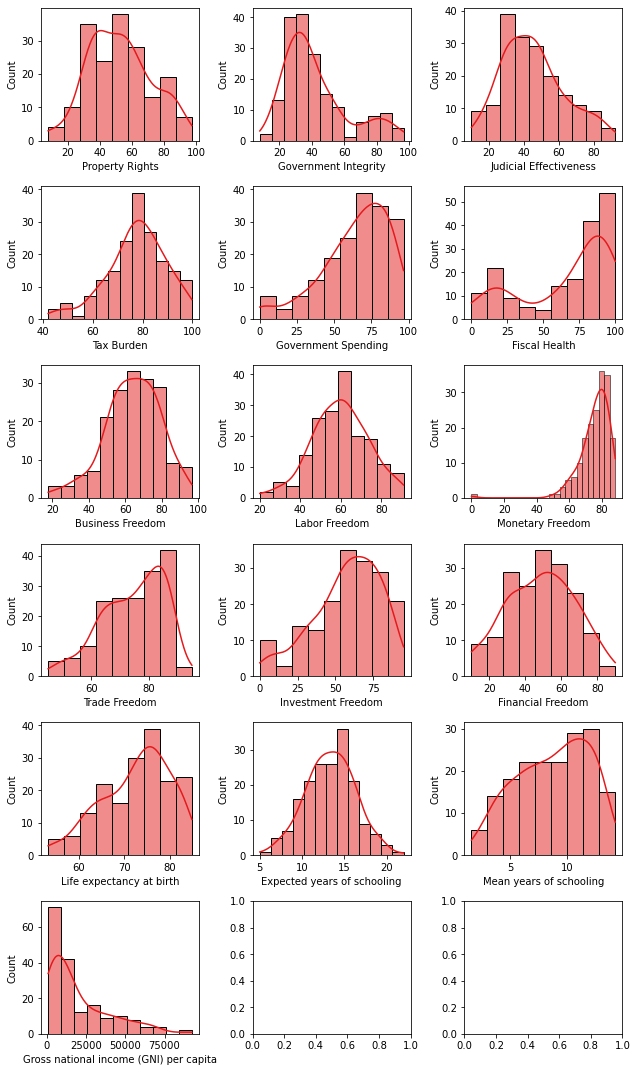

In [27]:
f,ax = plt.subplots(6,3,figsize=(9,15))

for i,fea in enumerate(continuous):
    r,c = i//3, i%3
    sns.histplot(df1[fea],ax=ax[r,c],kde=True)
#     ax[r,c].set_title('{}'.format(fea))
    
plt.tight_layout()
plt.savefig('kde.png')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


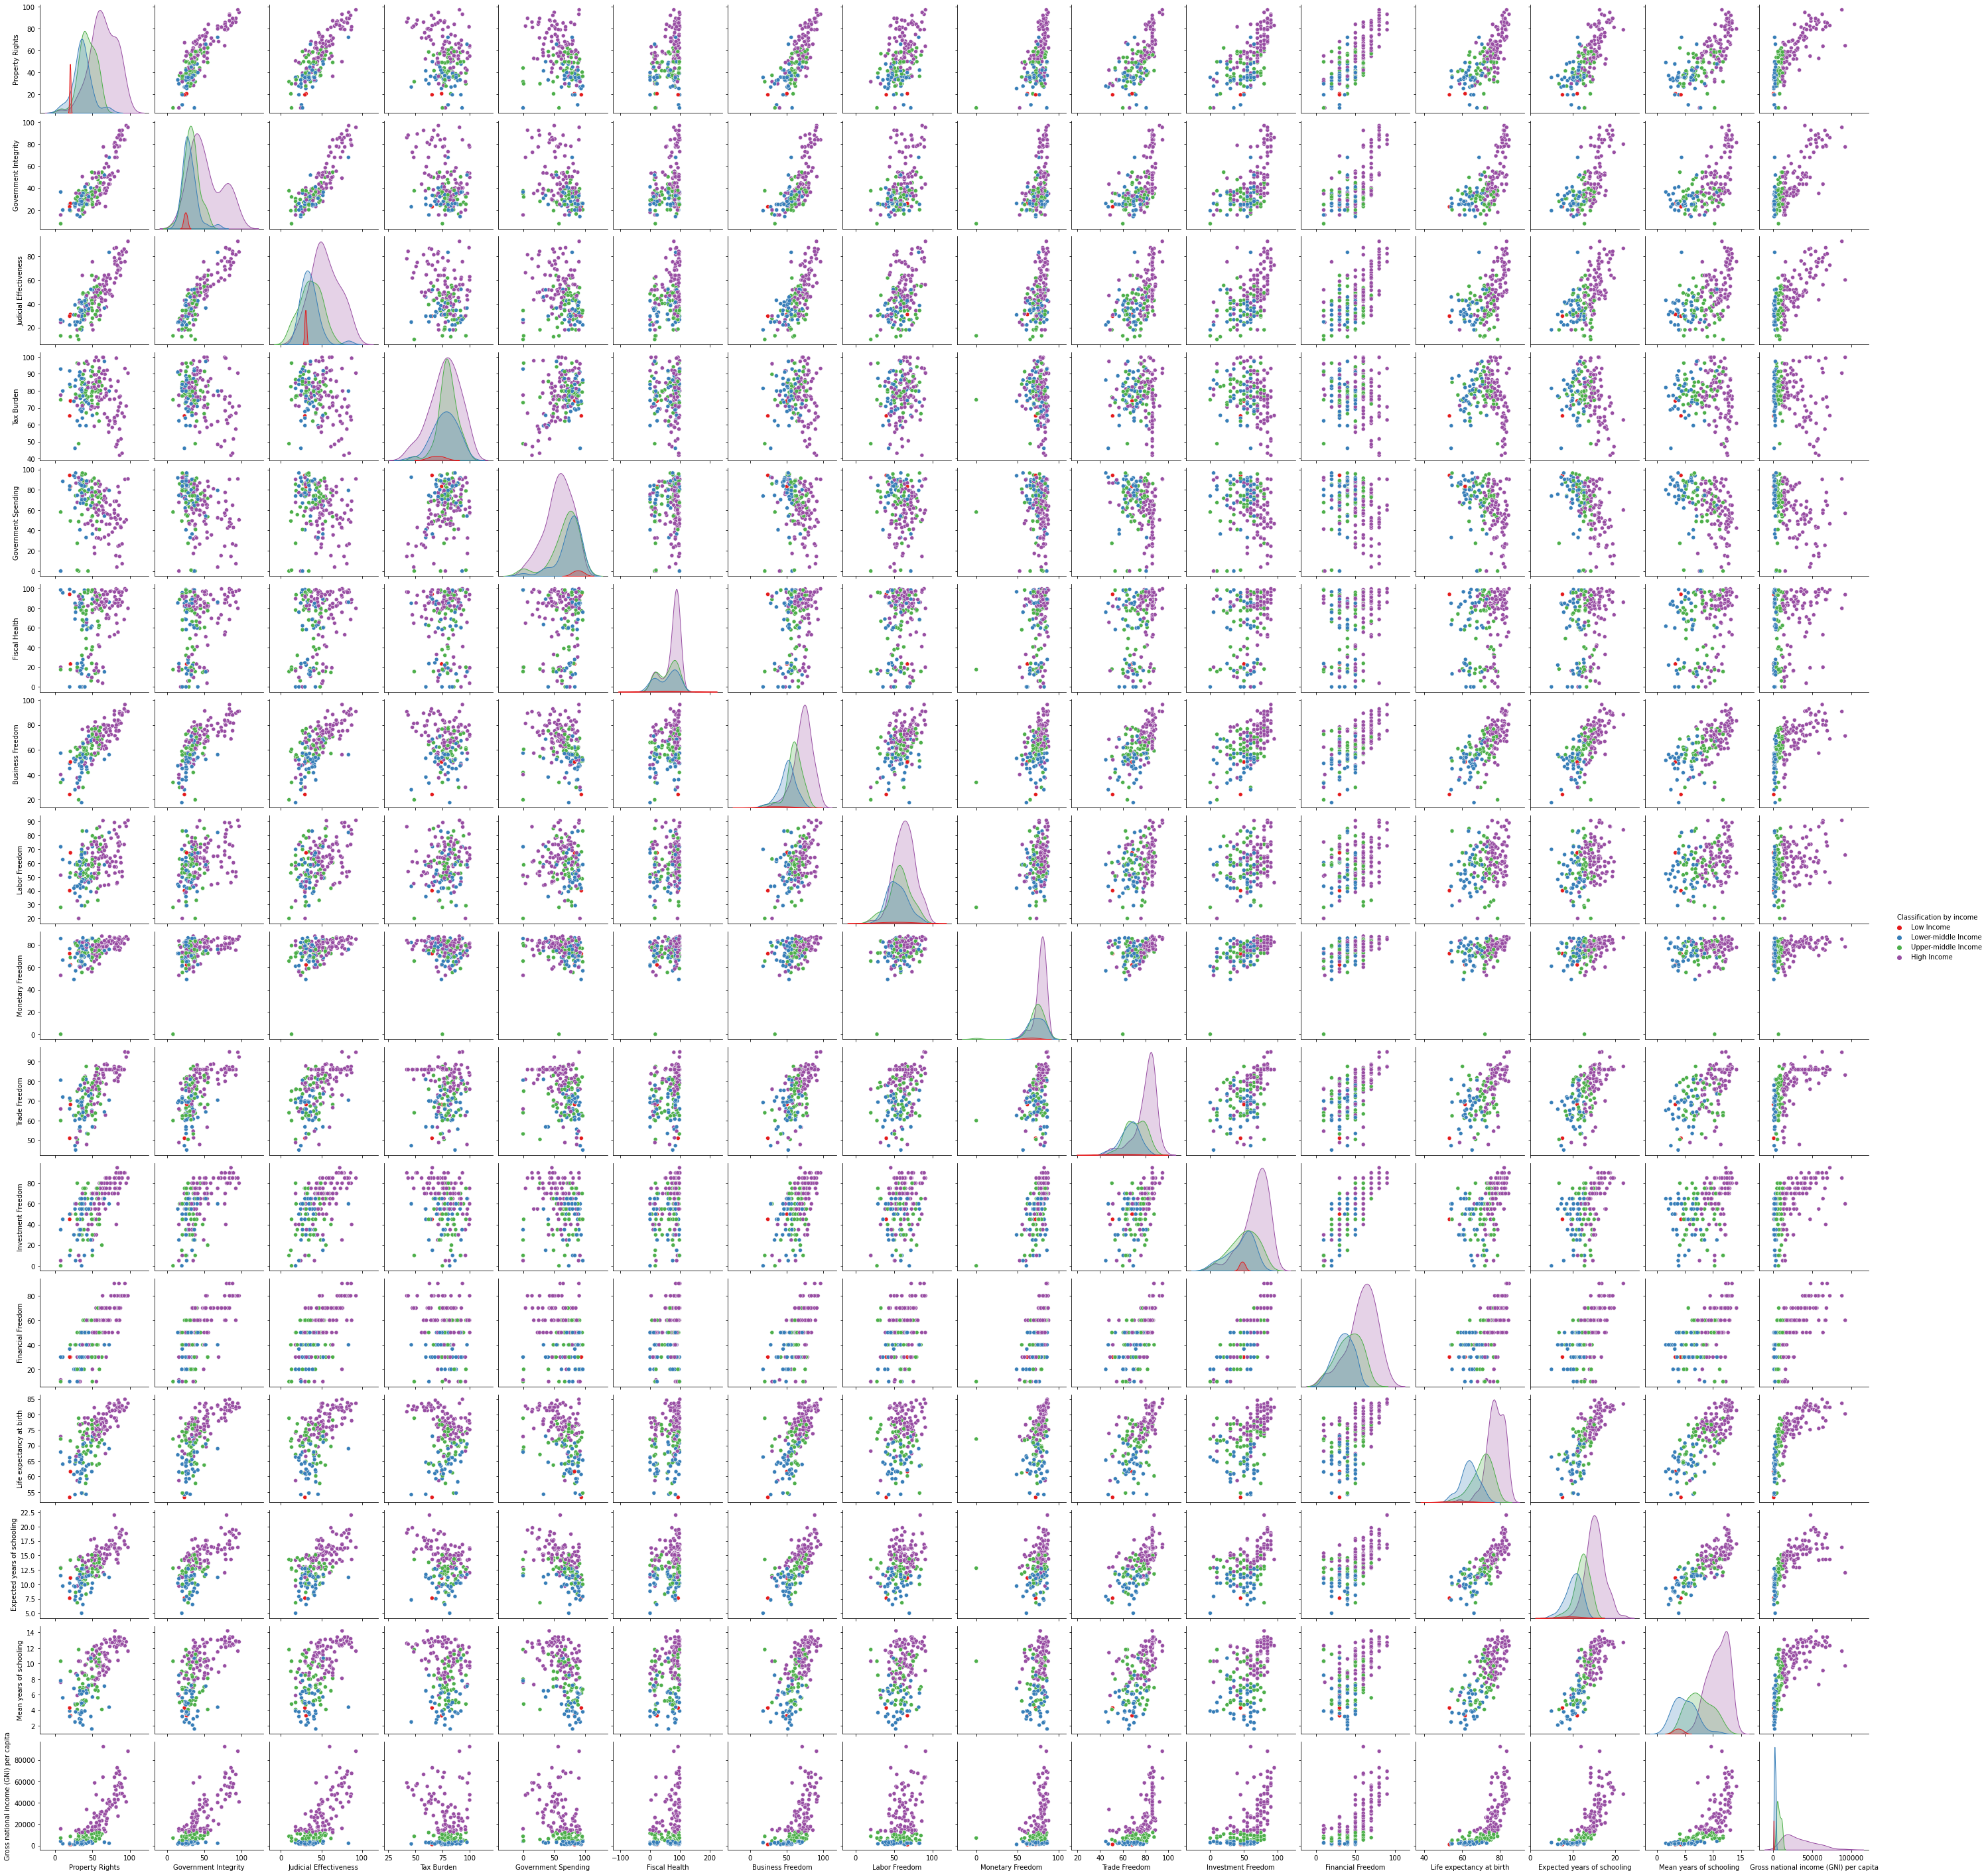

In [64]:
sns.pairplot(df1, hue="Classification by income", palette=sns.color_palette(colors))
plt.savefig('pair_big.png')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


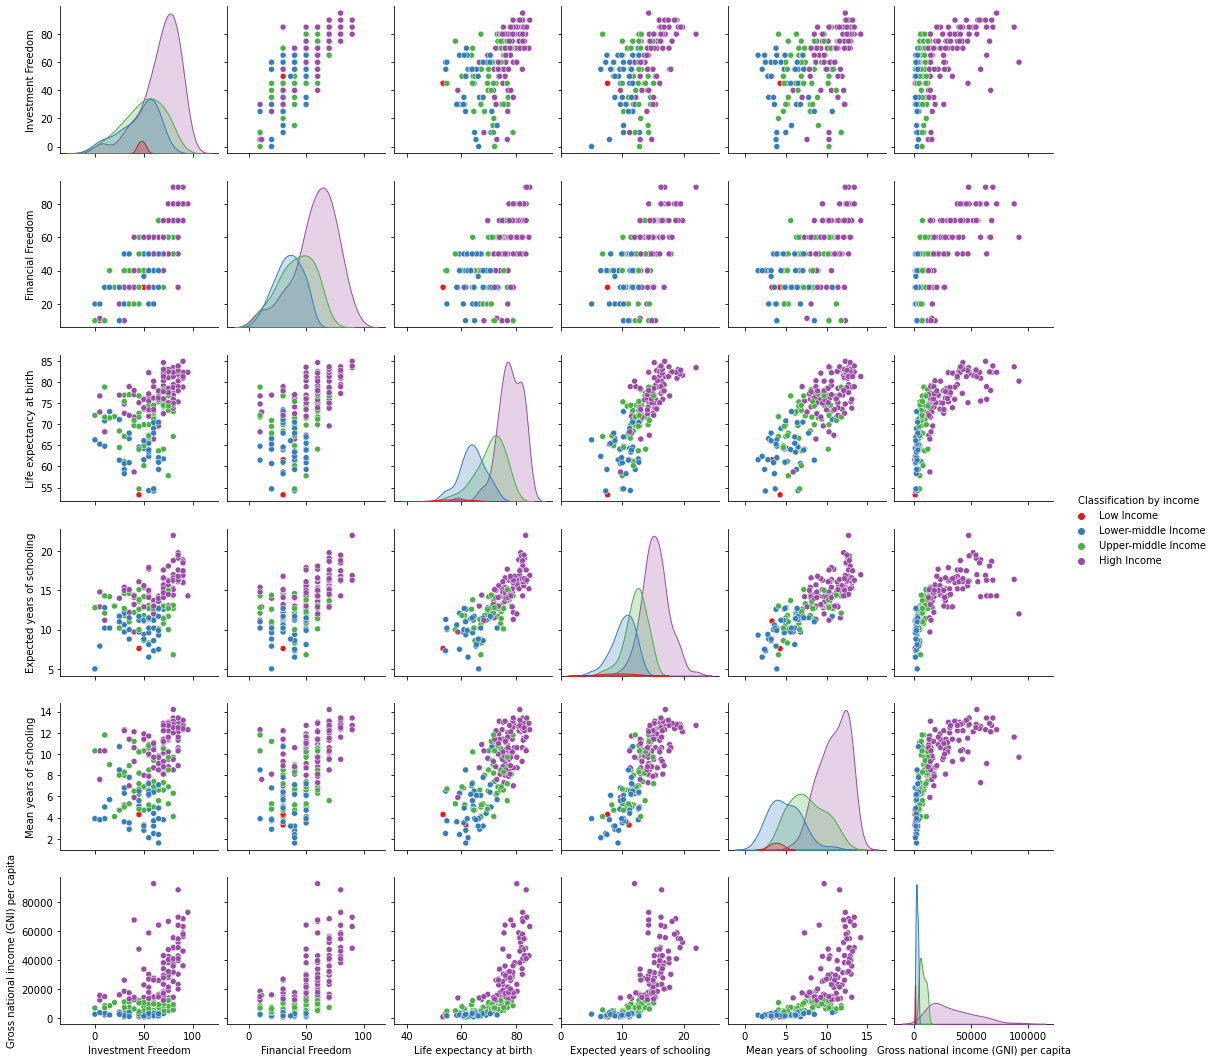

In [65]:
plot_fea = continuous[-6:]

sns.pairplot(df1, hue="Classification by income", vars=plot_fea, palette=sns.color_palette(colors))
plt.savefig('pair_small.png')

In [31]:
econ_fea = econ_df.columns[1:]
econ_fea

Index(['Property Rights', 'Government Integrity', 'Judicial Effectiveness',
       'Tax Burden', 'Government Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom', 'Financial Freedom'],
      dtype='object')

In [42]:
df1.iloc[:,:-1]

Property Rights  Government Integrity  Judicial Effectiveness  \
Country                                                                  
AFG                 19.6                  25.2                    29.6   
ALB                 54.8                  40.4                    30.6   
DZA                 31.6                  28.9                    36.2   
AGO                 35.9                  20.5                    26.6   
ARG                 47.8                  33.5                    44.5   
...                  ...                   ...                     ...   
VEN                  7.6                   7.9                    13.1   
VNM                 49.8                  34.0                    40.3   
YEM                 19.6                  20.3                    22.2   
ZMB                 45.0                  32.3                    35.6   
ZWE                 29.7                  15.8                    24.8   

         Tax Burden  Government Spending  Fiscal Health  Business Freedom  \
Country                                                                     
AFG           91.70                 80.3           99.3              49.2   
ALB           86.30                 73.9           80.6              69.3   
DZA           76.40                 48.7           18.7              61.6   
AGO           83.90                 80.7           58.2              55.7   
ARG           69.30                 49.5           33.0              56.4   
...             ...                  ...            ...               ...   
VEN           74.70                 58.1           17.6              33.9   
VNM           79.70                 74.1           40.7              63.5   
YEM           83.79                 83.7            0.0              45.1   
ZMB           72.30                 80.1           12.3              71.1   
ZWE           62.30                 74.5           23.7              33.4   

         Labor Freedom  Monetary Freedom  Trade Freedom  Investment Freedom  \
Country                                                                       
AFG               60.4              76.7           66.0                10.0   
ALB               52.7              81.5           87.8                70.0   
DZA               49.9              74.9           67.4                30.0   
AGO               58.8              55.4           61.2                30.0   
ARG               46.9              60.2           70.0                55.0   
...                ...               ...            ...                 ...   
VEN               28.0               0.0           60.0                 0.0   
VNM               62.8              68.9           79.2                30.0   
YEM               49.8              61.5           71.4                50.0   
ZMB               46.0              70.3           72.6                55.0   
ZWE               43.3              72.4           70.0                25.0   

         Financial Freedom  Life expectancy at birth  \
Country                                                
AFG                  10.00                      64.8   
ALB                  70.00                      78.6   
DZA                  30.00                      76.9   
AGO                  40.00                      61.2   
ARG                  60.00                      76.7   
...                    ...                       ...   
VEN                  10.00                      72.1   
VNM                  40.00                      75.4   
YEM                  36.55                      66.1   
ZMB                  50.00                      63.9   
ZWE                  10.00                      61.5   

         Expected years of schooling  Mean years of schooling  \
Country                                                         
AFG                             10.2                      3.9   
ALB                             14.7                     10.1   
DZA                        

In [46]:
from sklearn.preprocessing import StandardScaler
import numpy as np


# the scaler object (model)
scaler = StandardScaler()
# fit and transform the data
df1_scaled_mat = scaler.fit_transform(df1.iloc[:,:-1])
df1_scaled_mat

array([[-1.67749874, -0.84707957, -0.88277694, ..., -1.08766135,
        -1.54457767, -0.88659198],
       [ 0.11920481, -0.07447355, -0.82636947, ...,  0.45595442,
         0.44816949, -0.29300961],
       [-1.06498616, -0.659011  , -0.51048763, ...,  0.42165185,
        -0.22679326, -0.43544113],
       ...,
       [-1.67749874, -1.09614335, -1.30019224, ..., -1.56789737,
        -1.76956525, -0.91861889],
       [-0.38101379, -0.48619123, -0.54433211, ..., -0.64172791,
        -0.48392193, -0.83126358],
       [-1.16196732, -1.3248754 , -1.15353281, ..., -0.81324077,
        -0.06608785, -0.8645514 ]])

In [49]:
df1_scaled = df1.copy(deep=True)
df1_scaled.iloc[:,:-1] = df1_scaled_mat
df1_scaled.shape[1]

17

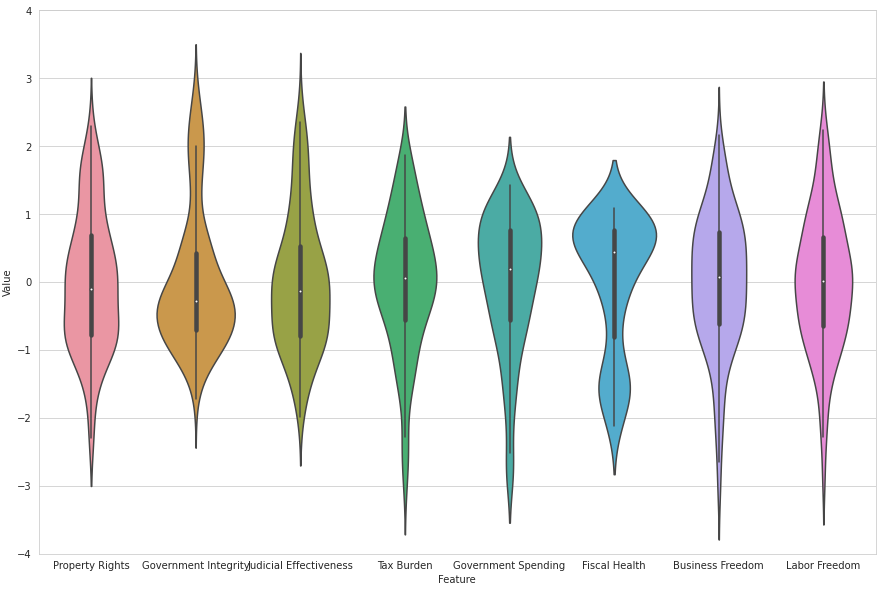

In [54]:
with sns.axes_style("whitegrid"):
    melted = df1_scaled.iloc[:,:df1_scaled.shape[1]//2].melt(var_name='Feature', value_name='Value')
    plt.figure(figsize=(15, 10))
    ax = sns.violinplot(x='Feature', y='Value', data=melted)
    ax.set_ylim(-4,4)
    plt.savefig('violins1.png')

In [62]:
melted.iloc[:,0]

0                             Monetary Freedom
1                             Monetary Freedom
2                             Monetary Freedom
3                             Monetary Freedom
4                             Monetary Freedom
                         ...                  
1419    Gross national income (GNI) per capita
1420    Gross national income (GNI) per capita
1421    Gross national income (GNI) per capita
1422    Gross national income (GNI) per capita
1423    Gross national income (GNI) per capita
Name: Feature, Length: 1424, dtype: object

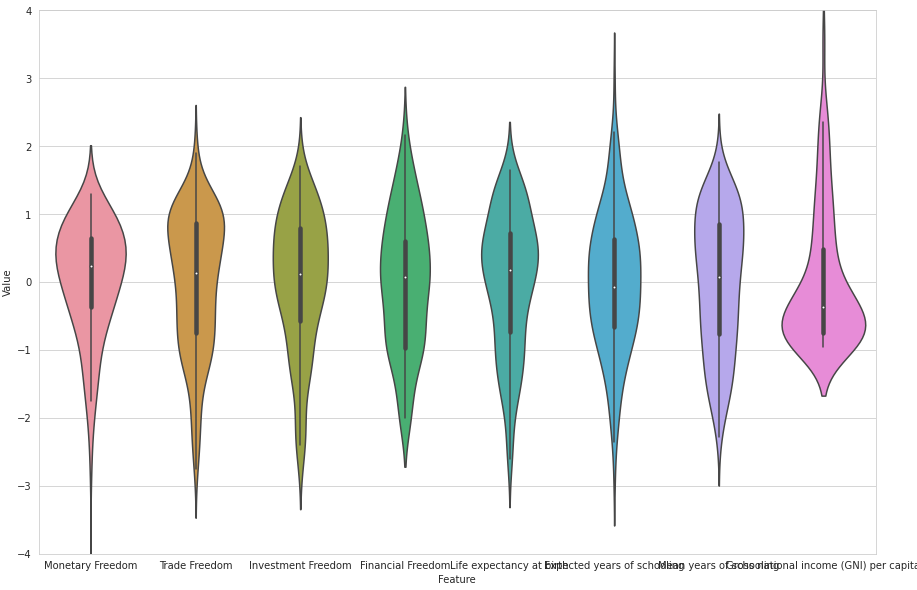

In [63]:
with sns.axes_style("whitegrid"):
    melted = df1_scaled.iloc[:,df1_scaled.shape[1]//2:-1].melt(var_name='Feature', value_name='Value')
    plt.figure(figsize=(15, 10))
    ax = sns.violinplot(x='Feature', y='Value', data=melted)
    ax.set_ylim(-4,4)
    plt.savefig('violins1.png')

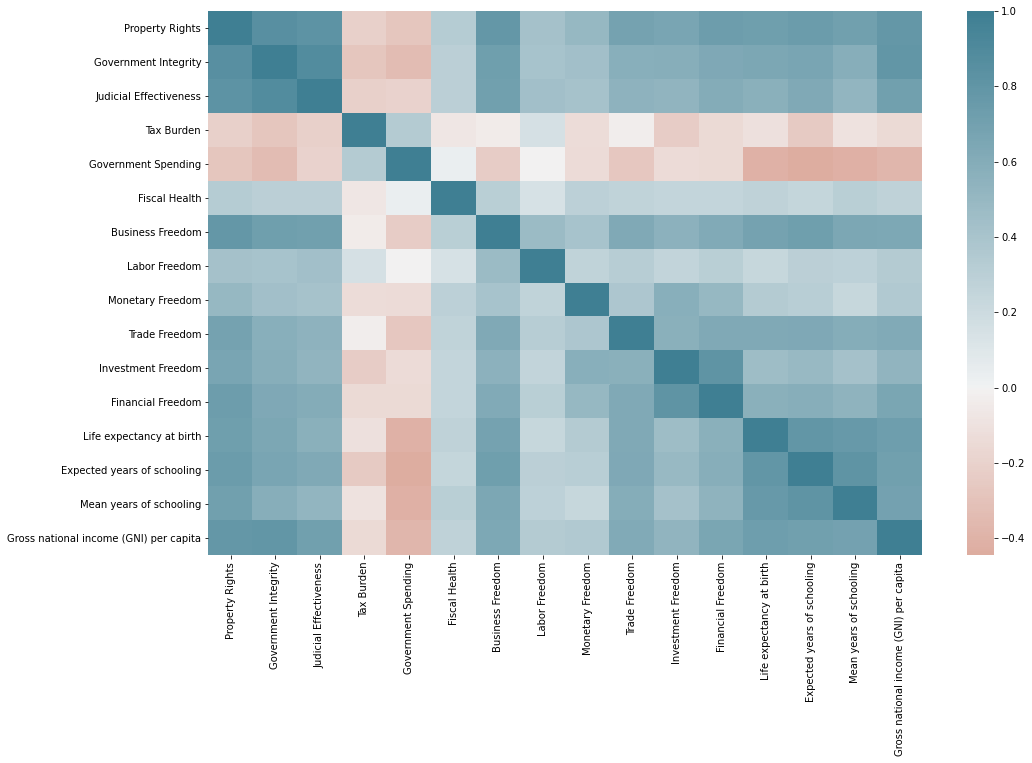

In [66]:
# calculate the correlation matrix
heat = ["#d8b365","#f5f5f5","#5ab4ac"]
corr = df1.corr()
plt.figure(figsize = (16,10))
# plot the heatmap
sns.heatmap(corr,
            cmap=sns.diverging_palette(20, 220, as_cmap=True),
        xticklabels=corr.columns,
        yticklabels=corr.columns,center=0)

plt.savefig("heat")